In [9]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

**Importing of dataset into the system**

In [10]:
df1=pd.read_csv('HRDataset_v14.csv')


In [11]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [12]:
df1.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [13]:
df1.isnull().sum() 


Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco


**Dropping the Date columns as they are not relevant to prediction**

```



In [14]:
df1.drop(['DateofTermination','DateofHire','DOB','LastPerformanceReview_Date'],axis=1,inplace=True)


In [15]:
df1.head()



,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,0,2


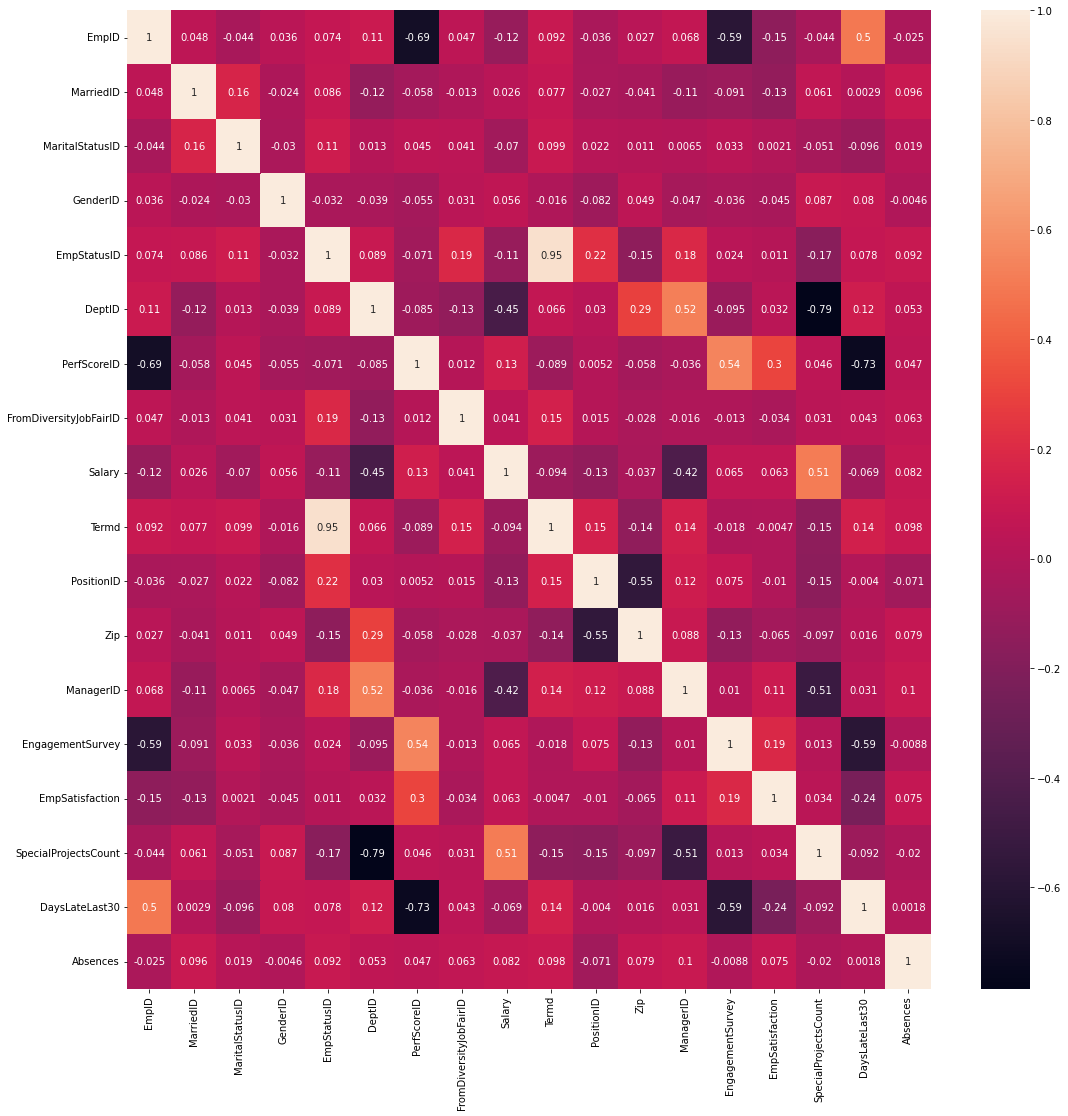

In [36]:
plt.figure(figsize=(18,18))
sns.heatmap(df1.corr(),annot=True)

<Figure size 1440x2160 with 0 Axes>

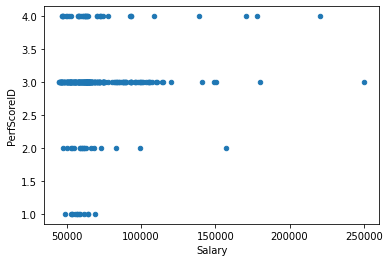

In [39]:
plt.figure(figsize=(20,30))
df1.plot(x='Salary',y='PerfScoreID',kind='scatter')

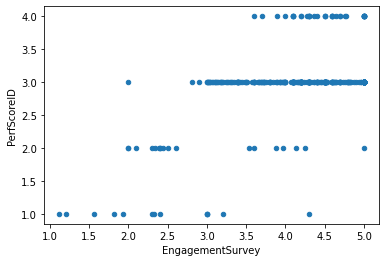

In [18]:
df1.plot(x='EngagementSurvey',y='PerfScoreID',kind='scatter')

In [19]:
df1['ManagerID'] = df1['ManagerID'].replace(np.nan, 39.0)
df1[df1['ManagerName']=='Webster Butler'][['ManagerName','ManagerID']]

,ManagerName,ManagerID
4,Webster Butler,39.0
19,Webster Butler,39.0
30,Webster Butler,39.0
44,Webster Butler,39.0
65,Webster Butler,39.0
88,Webster Butler,39.0
89,Webster Butler,39.0
105,Webster Butler,39.0
124,Webster Butler,39.0
135,Webster Butler,39.0


In [20]:
df1[['EmpSatisfaction','EmpSatisfaction','SpecialProjectsCount','ManagerID','GenderID','EmpStatusID','Sex','EmpStatusID','SpecialProjectsCount','SpecialProjectsCount']].isna().sum()

EmpSatisfaction         0
EmpSatisfaction         0
SpecialProjectsCount    0
ManagerID               0
GenderID                0
EmpStatusID             0
Sex                     0
EmpStatusID             0
SpecialProjectsCount    0
SpecialProjectsCount    0
dtype: int64

In [21]:
df1.corr()


,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
EmpID,1.000000,0.048058,-0.043851,0.035914,0.073750,0.107406,-0.691348,0.046805,-0.115319,0.092389,-0.036488,0.026858,0.068032,-0.589664,-0.146967,-0.043730,0.495513,-0.025278
MarriedID,0.048058,1.000000,0.164044,-0.024199,0.085619,-0.119932,-0.058362,-0.012708,0.026165,0.077028,-0.027334,-0.041147,-0.105159,-0.091178,-0.126191,0.061278,0.002875,0.096086
MaritalStatusID,-0.043851,0.164044,1.000000,-0.030236,0.114630,0.012768,0.044693,0.041117,-0.070291,0.099367,0.021923,0.010620,0.006467,0.033249,0.002068,-0.051093,-0.096500,0.018722
GenderID,0.035914,-0.024199,-0.030236,1.000000,-0.032440,-0.038838,-0.054915,0.031493,0.056097,-0.015741,-0.081612,0.048539,-0.046850,-0.036276,-0.044603,0.087073,0.080329,-0.004577
EmpStatusID,0.073750,0.085619,0.114630,-0.032440,1.000000,0.088711,-0.071208,0.189025,-0.110912,0.948058,0.221221,-0.150527,0.184280,0.024305,0.010553,-0.166560,0.078318,0.091834
DeptID,0.107406,-0.119932,0.012768,-0.038838,0.088711,1.000000,-0.084811,-0.129998,-0.448132,0.065922,0.030294,0.290023,0.519618,-0.094940,0.031997,-0.785101,0.124630,0.053308
PerfScoreID,-0.691348,-0.058362,0.044693,-0.054915,-0.071208,-0.084811,1.000000,0.012315,0.130903,-0.089061,0.005227,-0.058350,-0.036327,0.544927,0.303579,0.045677,-0.734728,0.046629
FromDiversityJobFairID,0.046805,-0.012708,0.041117,0.031493,0.189025,-0.129998,0.012315,1.000000,0.041248,0.147717,0.015085,-0.028314,-0.015970,-0.013040,-0.034468,0.031393,0.042532,0.062640
Salary,-0.115319,0.026165,-0.070291,0.056097,-0.110912,-0.448132,0.130903,0.041248,1.000000,-0.093994,-0.130563,-0.037242,-0.419467,0.064966,0.062718,0.508333,-0.069443,0.082382
Termd,0.092389,0.077028,0.099367,-0.015741,0.948058,0.065922,-0.089061,0.147717,-0.093994,1.000000,0.147042,-0.139006,0.136512,-0.017543,-0.004732,-0.147429,0.136379,0.098274


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

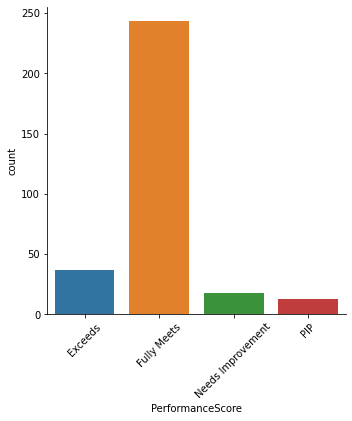

In [22]:
color_palette = sns.color_palette("tab10")
sns.set_palette(color_palette)
sns.catplot(x = "PerformanceScore",kind='count', data = df1)
plt.xticks(rotation=45)


In [23]:
X = df1[['MaritalStatusID','FromDiversityJobFairID','Salary','SpecialProjectsCount','EmpSatisfaction','Absences','PositionID','EngagementSurvey']]
y = df1['PerfScoreID']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Logistic Regression model**

In [40]:
from sklearn.base import ClassifierMixin
from sklearn.metrics.cluster import entropy
RandomForestClassifier
regressor = DecisionTreeClassifier(criterion='entropy', random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [41]:
#Running a logistic regression model
# Training the model
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression()

In [42]:
y_predict_log = model_logr.predict(X_test)

In [43]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.8191489361702128
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.82      1.00      0.90        77
           4       0.00      0.00      0.00        11

    accuracy                           0.82        94
   macro avg       0.20      0.25      0.23        94
weighted avg       0.67      0.82      0.74        94



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
confusion_matrix(y_test,y_predict_log)

array([[ 0,  0,  3,  0],
       [ 0,  0,  3,  0],
       [ 0,  0, 77,  0],
       [ 0,  0, 11,  0]])

**Finding the confusion matrix for different classes**

In [35]:
# Finding accuracy, precision, recall and confusion matrix when all classes are considered 
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6914893617021277
              precision    recall  f1-score   support

           1       0.50      0.67      0.57         3
           2       0.12      0.33      0.18         3
           3       0.85      0.79      0.82        77
           4       0.10      0.09      0.10        11

    accuracy                           0.69        94
   macro avg       0.39      0.47      0.42        94
weighted avg       0.73      0.69      0.71        94



In [30]:
confusion_matrix(y_test,y_pred)


array([[ 2,  0,  0,  1],
       [ 0,  1,  1,  1],
       [ 2,  7, 61,  7],
       [ 0,  0, 10,  1]])

**Decision tree visual representation**


In [45]:
clf = DecisionTreeClassifier(max_depth=5, random_state=0)
model = clf.fit(X_train,y_train)

In [46]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_7 <= 3.00
|   |--- feature_4 <= 2.50
|   |   |--- feature_2 <= 71156.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  71156.50
|   |   |   |--- class: 2
|   |--- feature_4 >  2.50
|   |   |--- feature_7 <= 1.96
|   |   |   |--- class: 1
|   |   |--- feature_7 >  1.96
|   |   |   |--- feature_7 <= 2.65
|   |   |   |   |--- feature_6 <= 8.00
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_6 >  8.00
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_7 >  2.65
|   |   |   |   |--- feature_2 <= 65706.00
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_2 >  65706.00
|   |   |   |   |   |--- class: 1
|--- feature_7 >  3.00
|   |--- feature_4 <= 2.50
|   |   |--- feature_7 <= 3.67
|   |   |   |--- class: 1
|   |   |--- feature_7 >  3.67
|   |   |   |--- class: 2
|   |--- feature_4 >  2.50
|   |   |--- feature_7 <= 3.90
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- feature_2 <= 53784.50
|   |   |   |   |   |--- class: 3
|   |   |

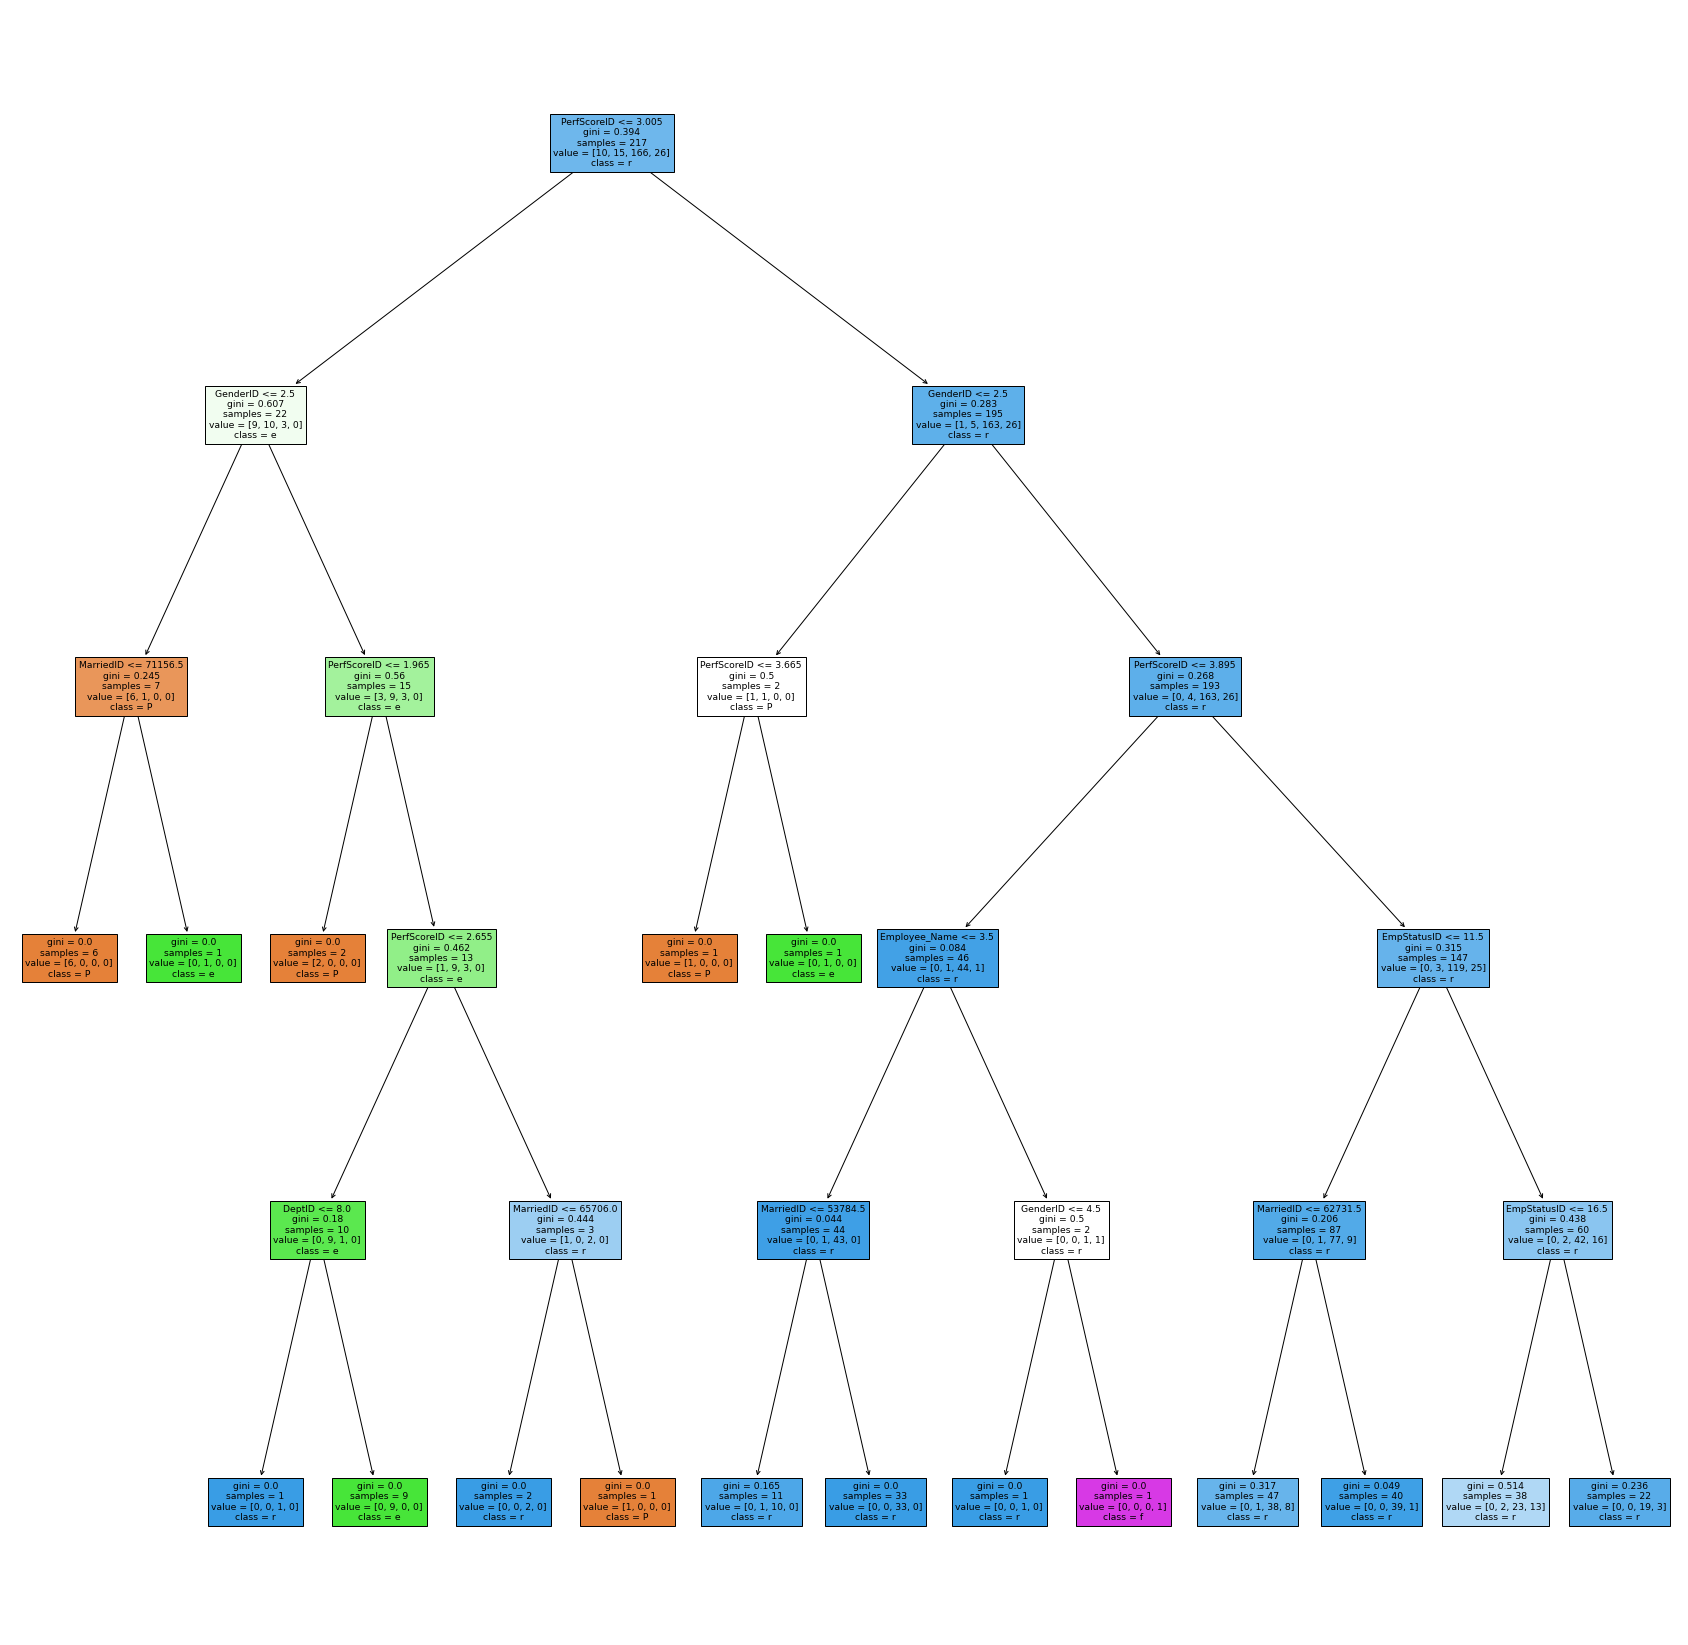

In [47]:
Dig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(clf, 
                   feature_names=df.columns,  
                   class_names='PerfScoreID',
                   filled=True)

**SVM model Trainign**


In [ ]:
print(accuracy_score(y_test,y_pred))

0.6914893617021277
